In [148]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [149]:
df=pd.read_csv('tips.csv')


1. what is the average tip (as a percentage of meal cost) for for lunch and for dinner?

In [150]:
df['tip_percentage']=df['tip']/df['total_bill']*100
df.groupby('time')['tip_percentage'].mean()



time
Dinner    15.951779
Lunch     16.412793
Name: tip_percentage, dtype: float64

2. what is average tip for each day of the week (as a percentage of meal cost)?

In [151]:
df.groupby('day')['tip_percentage'].mean()


day
Fri     16.991303
Sat     15.315172
Sun     16.689729
Thur    16.127563
Name: tip_percentage, dtype: float64

3. when are tips highest (which day and time)?

In [152]:
print(df.groupby(['day','time'])['tip'].max())
print("the highest tip is on sunday at dinner")

day   time  
Fri   Dinner     4.73
      Lunch      3.48
Sat   Dinner    10.00
Sun   Dinner     6.50
Thur  Dinner     3.00
      Lunch      6.70
Name: tip, dtype: float64
the highest tip is on sunday at dinner


4. compute the correlation between meal prices and tips

In [153]:

print("the correlation between meal prices and tips is",df['total_bill'].corr(df['tip']))



the correlation between meal prices and tips is 0.6757341092113646


5. is there any relationship between tips and size of the group?

In [154]:
# is there any relationship between tips and size of the group?
print("the correlation between meal prices and tips is",df["size"].corr(df['tip']))

the correlation between meal prices and tips is 0.48929877523035725


6. what percentage of people are smoking?

In [155]:
#what percentage of people are smoking?
print(df['smoker'].value_counts(normalize=True)*100)
print("the percentage of people who smoke is 38.5%")


No     61.885246
Yes    38.114754
Name: smoker, dtype: float64
the percentage of people who smoke is 38.5%


7. assume that rows in the tips.csv file are arranged in time. Are tips increasing with time in each day?

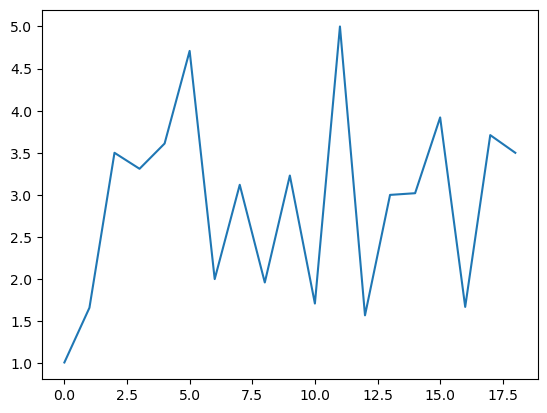

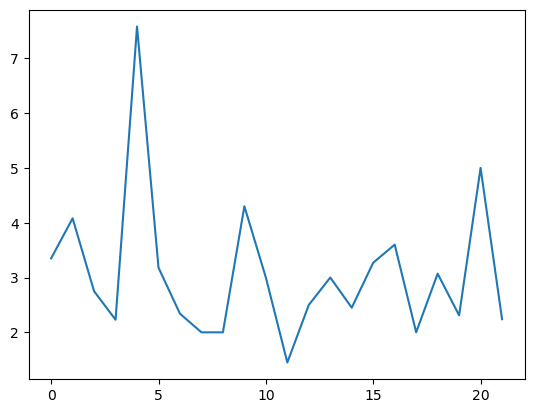

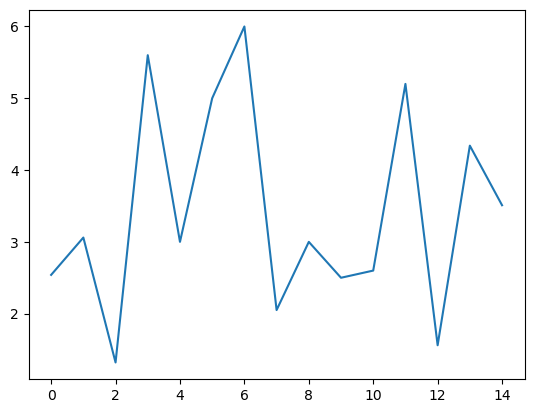

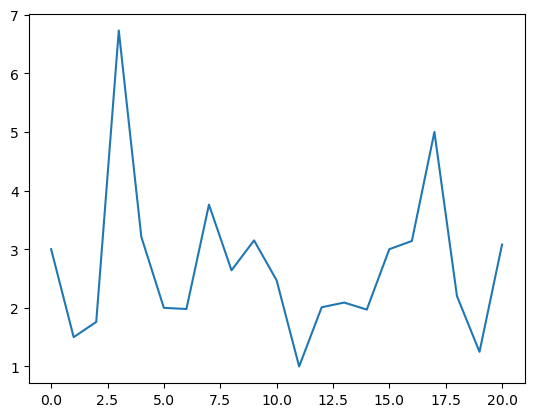

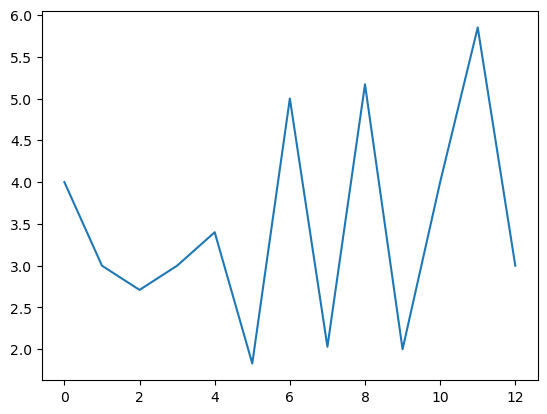

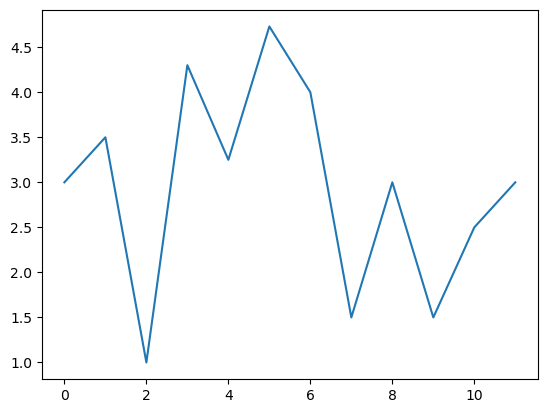

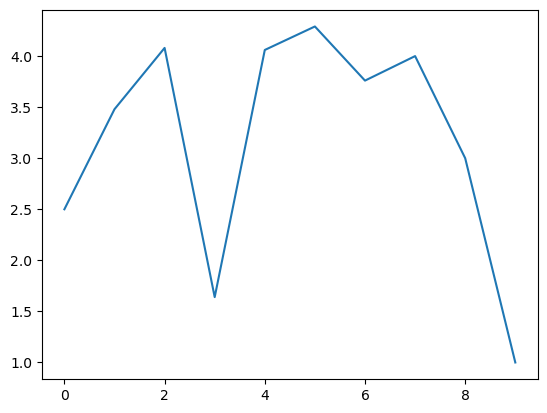

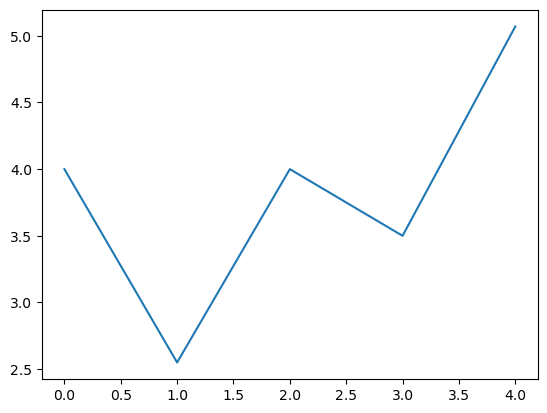

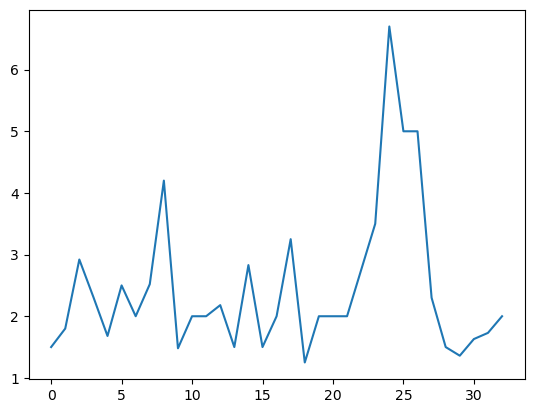

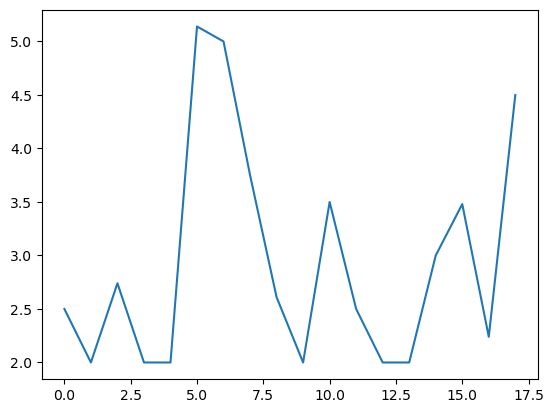

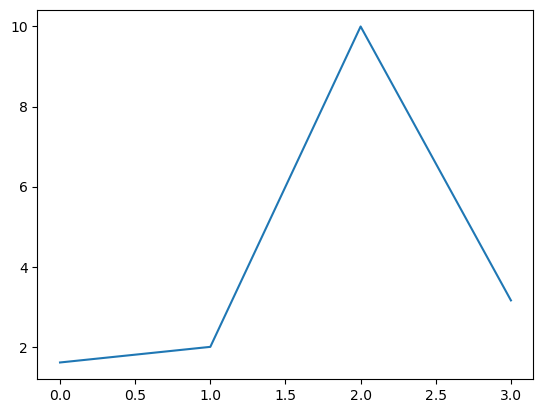

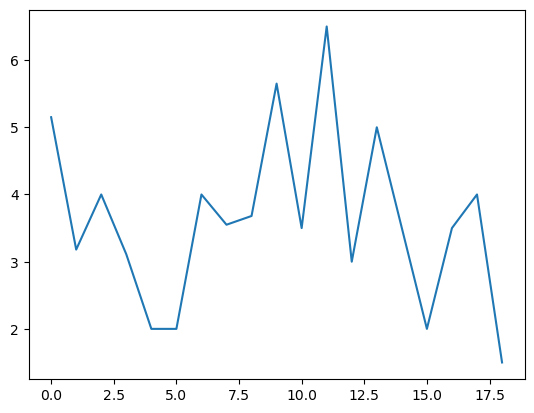

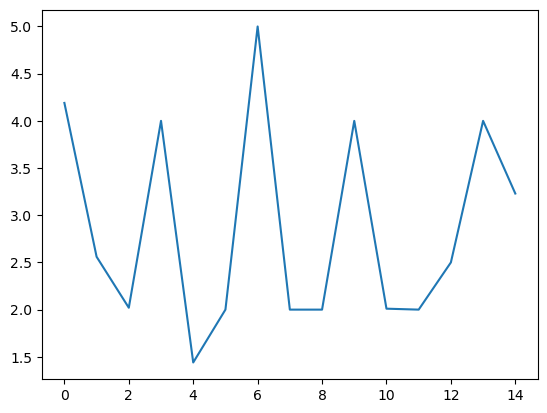

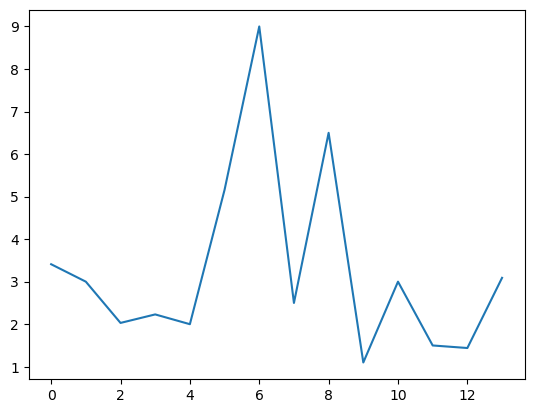

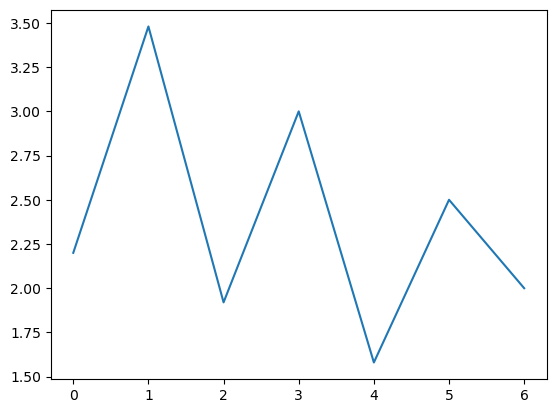

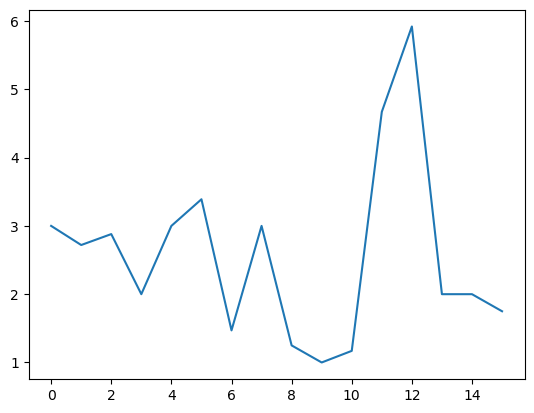

we can see that tips are not increasing with time in each day, it's irregular


In [156]:
# assume that rows in the tips.csv file are arranged in time. Are tips increasing with time in each day?    
tip_arr=[]
for i in range(len(df)-1):
    tip_arr.append(df["tip"][i])
    if df["day"][i]!=df["day"][i+1]:
        plt.plot(tip_arr)
        plt.show()
        tip_arr=[]
print("we can see that tips are not increasing with time in each day, it's irregular")

    


8. is there any difference in correlation between tip amounts from smokers and non-smokers?

In [157]:

print("the correlation between meal prices and tips for smokers is",df[df['smoker']=='Yes']["total_bill"].corr(df[df['smoker']=='Yes']['tip']))
print("the correlation between meal prices and tips for non-smokers is",df[df['smoker']=='No']["total_bill"].corr(df[df['smoker']=='No']['tip']))




the correlation between meal prices and tips for smokers is 0.48821794116281
the correlation between meal prices and tips for non-smokers is 0.8221826257050829
